Opendatasets - это библиотека Python, которая позволяет загружать наборы данных из различных источников, включая Kaggle, Google Dataset Search

1. Устанавливаем библиотеку opendatasets с помощью команды:

```bash
    %pip install opendatasets
```

2. Импортируем библиотеку `opendatasets`:

```python
   import opendatasets as od
```

3. Используем функцию `download` из библиотеки opendatasets, чтобы загрузить датасет с Kaggle. Укажите URL датасета в качестве аргумента функции. Не забудьте указать свой username и Kaggle API, когда программа попросит


In [1]:
%pip install opendatasets 
import opendatasets as od 
od.download("https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset")

Note: you may need to restart the kernel to use updated packages.
Skipping, found downloaded files in ".\covid19-image-dataset" (use force=True to force download)


Импорт необходимых библиотек

In [2]:
from keras import layers  # Импорт модуля layers из библиотеки Keras
import tensorflow as tf   # Импорт библиотеки TensorFlow под псевдонимом tf
from tensorflow import keras  # Импорт модуля keras из библиотеки TensorFlow
from tensorflow.keras import layers # Импорт модуля layers из библиотеки keras в TensorFlow
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Импорт класса ImageDataGenerator для обработки изображений
from tensorflow.keras import Sequential # Импорт класса Sequential для создания последовательной модели нейронной сети
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Dense, Dropout # Импорт слоев GlobalAveragePooling2D, Flatten, Dense, Dropout для построения модели
from tensorflow.keras.optimizers import Adam # Импорт оптимизатора Adam для обучения модели
from tensorflow.keras.applications.vgg16 import VGG16 # Импорт предварительно обученной модели VGG16
from tensorflow.keras.callbacks import ModelCheckpoint # Импорт колбэка ModelCheckpoint для сохранения лучших весов модели
from tensorflow.keras.preprocessing import image # Импорт модуля image для обработки изображений
import matplotlib.pyplot as plt # Импорт библиотеки matplotlib.pyplot для визуализации данных
import numpy as np # Импорт библиотеки NumPy для работы с массивами и матрицами
import pandas as pd # Импорт библиотеки Pandas для работы с данными в виде таблиц
import warnings # Импорт модуля warnings для управления предупреждениями
import os # Импорт модуля os для работы с операционной системой
warnings.filterwarnings("ignore") # Отключение вывода предупреждений


Для начала определяются переменные `height` и `width`, которые устанавливают размеры изображений в пикселях (180x180), а также `batch_size`, который задает размер пакета данных для обучения (32).

Затем указываются пути к директориям с данными обучения и тестирования:
- `training_directory` - путь к директории с обучающими данными
- `testing_directory` - путь к директории с тестовыми данными

Далее определяется функция `get_data(path)`, которая использует `ImageDataGenerator` для создания генератора данных изображений. Функция загружает данные из указанной директории `path`, преобразует их в формат, пригодный для обучения модели, и возвращает этот набор данных.

Затем вызывается функция `get_data` для загрузки обучающих и тестовых данных из соответствующих директорий. Для обучающих данных классы изображений указаны как 'Normal', 'Viral Pneumonia' и 'Covid', соответственно, с помощью числовых меток 0, 1 и 2. Данные перемешиваются и подаются в пакетах размером `batch_size`.

Схема директории `covid19-image-dataset`:
- Covid19-dataset
  - Test
    - Covid
    - Normal
    - Viral Pneumonia
  - Train
    - Covid
    - Normal
    - Viral Pneumonia


In [3]:
height, width = 180, 180  
batch_size = 32  
training_directory = 'C:\\Users\\yegor\\Desktop\\covid_cv\\covid19-image-dataset\\Covid19-dataset\\train'  # Директории с обучающими данными (необходимо заменить на свой путь)
testing_directory = 'C:\\Users\\yegor\\Desktop\\covid_cv\\covid19-image-dataset\\Covid19-dataset\\test'  #Директории с тестовыми данными (необходимо заменить на свой путь)

def get_data(path):
    generator = ImageDataGenerator(rescale=1./255.)  # Создание генератора изображений с масштабированием значений пикселей
    data = generator.flow_from_directory(
        path,
        classes={'Normal': 0, 'Viral Pneumonia': 1, 'Covid': 2},  # Классы изображений и их числовые метки
        batch_size=batch_size,  # Размер пакета данных (батчей)
        shuffle=True,  # Перемешивание данных
        seed=122,  # Задание seed для воспроизводимости результатов
        class_mode='binary',  # Режим классификации (бинарный)
        target_size=(height, width),  # Целевой размер изображений для обработки
    )
    return data

training_data = get_data(training_directory)  # Получение обучающих данных с помощью функции get_data
testing_data = get_data(testing_directory)  # Получение тестовых данных с помощью функции get_data


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


Печатаем список классов

In [4]:
class_names = list(training_data.class_indices.keys())
class_names

['Normal', 'Viral Pneumonia', 'Covid']

Функция `get_augmented_data(path)` создает генератор данных с аугментацией изображений для обучения модели

Аугментация данных - это способ создания разнообразия входных данных для обучения модели путем их изменения

Параметры аугментации, указанные в функции:
- `rescale = 1./255` - масштабирование значений пикселей изображений
- `zoom_range = 0.1` - диапазон масштабирования изображения
- `rotation_range = 30` - диапазон поворота изображения
- `width_shift_range = 0.1` - диапазон сдвига по ширине
- `height_shift_range = 0.1` - диапазон сдвига по высоте
- `horizontal_flip = True` - горизонтальное отражение изображения

Далее вызывается метод `flow_from_directory` для создания генератора данных из указанной директории `path`. Параметры метода включают размер пакета данных (`batch_size`), seed для воспроизводимости результатов, режим классификации (`class_mode`), целевой размер изображений (`target_size`) и классы изображений с их числовыми метками.

`augmented_training_data` содержит аугментированные обучающие данные, полученные с помощью функции `get_augmented_data`.

Аугментация изображений важна для улучшения обобщающей способности модели, уменьшения переобучения и повышения ее устойчивости к различным вариациям входных данных.


In [5]:
def get_augmented_data(path):
  data = ImageDataGenerator(
      rescale = 1./255,
      zoom_range = 0.1,
      rotation_range = 30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True
  ).flow_from_directory(
       path,
        batch_size=batch_size,
        seed=122,
        class_mode='binary',
        target_size=(height, width),
        classes={'Normal': 0, 'Viral Pneumonia': 1, 'Covid': 2}
    )
  return data
augmented_training_data = get_augmented_data(training_directory)

Found 251 images belonging to 3 classes.


Печатаем первые 9 значений из train датасета

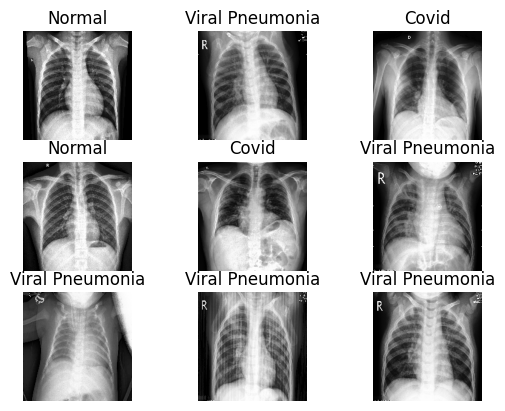

In [6]:
images, labels = next(training_data) # 

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(class_names[int(labels[i])])
    plt.axis('off')

plt.show()

Печатаем первые 9 значений из train датасета, но изображения уже после аугментации

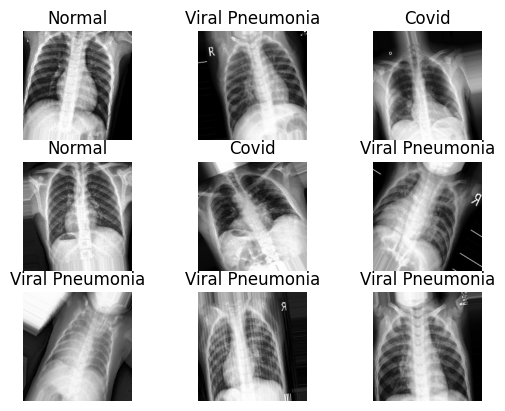

In [7]:
images, labels = next(augmented_training_data)


for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(class_names[int(labels[i])])
    plt.axis('off')

plt.show()

В данном коде создается нейронная сеть для классификации изображений с использованием предобученной модели `VGG16`.

**Структура нейронной сети:**
- Входной слой с формой `(высота, ширина, 3)` для изображений RGB.
- Предобученная модель VGG16 без верхних слоев.
- `GlobalAveragePooling2D` для усреднения признаков по пространственным измерениям.
- `Flatten` для преобразования данных в одномерный вектор.
- Два полносвязанных слоя с 256 нейронами и функцией активации `ReLU`.
- Два слоя `Dropout` с коэффициентом 0.5 для регуляризации.
- Выходной слой с 3 нейронами и функцией активации `softmax` для классификации на 3 класса.



In [8]:
def build_nn(base_nn):
  tf.keras.backend.clear_session() #
  input_shape = (height, width, 3)
  base = base_nn(
        weights='imagenet', #Веса 'imagenet' используются для загрузки предобученных весов модели, которая была обучена на датасете ImageNet
        include_top=False, # #Параметр `include_top=False` указывает на то, что мы не хотим включать верхние (полносвязанные) слои модели, так как мы собираемся добавить свои собственные слои для решения конкретной задачи классификации
        input_shape=input_shape
    )
  base.trainable = False #Блокируем, чтобы сохранить предобученные веса и избежать их процесса обучения на новом датасете
  nn = Sequential()
  nn.add(base)
  nn.add(GlobalAveragePooling2D())
  nn.add(Flatten())
  nn.add(Dense(256, activation='relu'))
  nn.add(Dropout(0.5))
  nn.add(Dense(256, activation='relu'))
  nn.add(Dropout(0.5))
  nn.add(Dense(3, activation='softmax'))
  nn.compile(loss='SparseCategoricalCrossentropy', optimizer=Adam(0.001),metrics=['acc'])
  return nn

model =  build_nn(VGG16)

### Описание функции `fit_nn`

Функция `fit_nn` принимает следующие аргументы:
- `nn`: модель нейронной сети, которую необходимо обучить
- `save_path`: путь для сохранения лучших весов модели
- `train_data`: данные для обучения модели
- `test_data`: данные для валидации модели

#### Параметры функции:
- `checkpoint`: создание объекта `ModelCheckpoint`, который будет сохранять лучшие веса модели на основе метрики `acc` (точность)
- `fitting`: обучение модели `nn` на данных `train_data`, с валидацией на `test_data`, в течение 50 эпох
- `epochs=50`: количество эпох обучения
- `shuffle=False`: отключение перемешивания данных перед каждой эпохой
- `verbose=True`: вывод информации о процессе обучения
- `callbacks=[checkpoint]`: использование коллбэка `checkpoint` для сохранения лучших весов модели

#### Возвращаемое значение:
- `fitting`: объект, содержащий информацию об обучении модели

Функция `fit_nn` позволяет обучить нейронную сеть `nn`, сохранить лучшие веса модели по указанному пути `save_path` и возвращает информацию об обучении модели.


In [9]:
def fit_nn(nn, save_path, train_data, test_data):
    # Создание объекта ModelCheckpoint для сохранения лучших весов модели
    checkpoint = ModelCheckpoint(save_path, monitor='acc', verbose=1, mode='max',save_best_only=True)
     # Обучение нейронной сети nn на данных train_data с валидацией на test_data
    fitting = nn.fit(
        train_data,
        validation_data = test_data,
        epochs=50,
        shuffle=False,
        verbose=True,
        callbacks=[checkpoint])
    return fitting

Функция plot_fitting визуализирует результаты обучения нейронной сети, используя данные о точности и потерях как для обучающего, так и для валидационного наборов

In [10]:
def plot_fitting(fitting):
    acc = fitting['acc']
    val_acc = fitting['val_acc']
    loss = fitting['loss']
    val_loss = fitting['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='training acc')
    plt.plot(epochs, val_acc, label='validation acc')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, label='training loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.legend()


Блок кода проверяет наличие файла `Covid_weights.h5` по указанному пути. Если файл существует, веса модели загружаются, история обучения считывается из файла `history.csv`, после чего вызывается функция `plot_fitting` для визуализации результатов обучения.

Если файл с весами не существует, создается новая модель, обучается на данных `augmented_training_data` с валидацией на `testing_data` с помощью функции `fit_nn`. Затем веса модели сохраняются в файл `Covid_weights.h5`, и история обучения записывается в файл `history.csv`. Наконец, вызывается функция `plot_fitting` для визуализации результатов обучения новой модели.


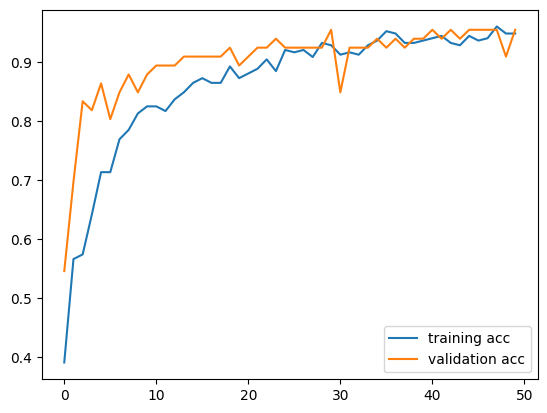

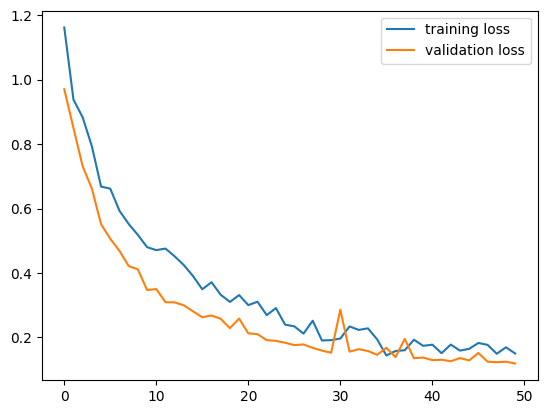

In [11]:
if os.path.exists('C:\\Users\\yegor\\Desktop\\covid_cv\\Covid_weights.h5'):#проверка, есть ли файл такой (не забудьте поменять директорию):
    model.load_weights('C:\\Users\\yegor\\Desktop\\covid_cv\\Covid_weights.h5')
    history = pd.read_csv('C:\\Users\\yegor\\Desktop\\covid_cv\\history.csv')
    plot_fitting(history)
else:
    # Если файл с весами не существует, создаем новую модель и сохраняем историю обучения
    fitting_model = fit_nn(model, 'model/vgg16', augmented_training_data, testing_data)
    model.save_weights('C:\\Users\\yegor\\Desktop\\covid_cv\\Covid_weights.h5')
    pd.DataFrame(fitting_model.history).to_csv('C:\\Users\\yegor\\Desktop\\covid_cv\\history.csv', index=False)
    plot_fitting(fitting_model.history)

Функция `predict_class_and_probability` предназначена для предсказания класса и вероятности принадлежности изображения к этому классу с использованием модели нейронной сети. Сейчас возьмём изображение человека с нормальными лёгкими и посмотрим результат

In [12]:

def predict_class_and_probability(model, image_path):
    # Загрузка изображения и изменение его размера до указанных значений
    img = image.load_img(image_path, target_size=(height, width))
    
    # Преобразование изображения в массив numpy
    x = image.img_to_array(img)
    
    # Добавление измерения для батча
    x = np.expand_dims(x, axis=0)
    
    # Нормализация значений пикселей изображения
    x = x / 255.0
    
    # Предсказание класса для изображения
    predictions = model.predict(x)
    
    # Определение индекса класса с наибольшей вероятностью
    class_index = np.argmax(predictions)
    
    # Получение имени класса по индексу
    class_name = class_names[class_index]
    
    # Вычисление вероятности принадлежности к данному классу
    probability = predictions[0][class_index] * 100
    
    return class_name, probability

# Пример использования
random_image_path = 'C:\\Users\\yegor\\Desktop\\covid_cv\\covid19-image-dataset\\Covid19-dataset\\test\\Normal\\0101.jpeg'
predicted_class, predicted_probability = predict_class_and_probability(model, random_image_path)
print(f"Картинка принадлежит к классу {predicted_class} с вероятностью {predicted_probability:.2f}%")


1/1 [==============================] - 1s 1s/step
Картинка принадлежит к классу Normal с вероятностью 95.11%


А теперь человека с ковидом

In [13]:
random_image_path = 'C:\\Users\\yegor\\Desktop\\covid_cv\\covid19-image-dataset\\Covid19-dataset\\test\\Covid\\094.png'
predicted_class, predicted_probability = predict_class_and_probability(model, random_image_path)
print(f"Картинка принадлежит к классу {predicted_class} с вероятностью {predicted_probability:.2f}%")

1/1 [==============================] - 0s 250ms/step
Картинка принадлежит к классу Covid с вероятностью 96.67%
